In [165]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error

In [166]:
# Loading entire dataset
dataset = pd.read_csv('dataset.csv')

In [167]:
dataset[:2]

,Affluence,Capacite,Journee,Jours,Date,Heure,Domicile,Resultat,exterieur,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final
0,24551,50000,1,sam,21/07/1989,20:30,Olympique de lyonnais,1-4,Olympique de Marseille,1,42.1,18,1,8,1
1,15572,50000,2,ven,29/07/1989,20:30,Olympique de lyonnais,3-0,Toulouse FC,0,42.1,7,8,8,9


In [168]:
le = LabelEncoder()

dataset['Jours_label'] = le.fit_transform(dataset.Jours)
dataset['exterieur_label'] = le.fit_transform(dataset.exterieur)
dataset['Domicile_label'] = le.fit_transform(dataset.Domicile)
dataset['Capacite_label'] = le.fit_transform(dataset.Capacite)
dataset['Heure_label'] = le.fit_transform(dataset.Heure)

In [169]:
dataset.describe() 

,Affluence,Capacite,Journee,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final,Jours_label,exterieur_label,Domicile_label,Capacite_label,Heure_label
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.0,540.000000,540.000000
mean,31306.225926,44713.451852,19.403704,0.146296,59.815370,5.459259,10.998148,4.303704,10.655556,3.287037,27.116667,0.0,3.192593,13.316667
std,9831.207951,5574.270324,10.888880,0.353731,11.923686,4.405281,5.593695,3.898573,5.592855,2.099788,15.067298,0.0,2.223992,4.611201
min,6000.000000,39490.000000,1.000000,0.000000,31.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,23745.750000,41044.000000,10.000000,0.000000,57.900000,2.000000,6.000000,2.000000,6.000000,0.000000,15.000000,0.0,1.000000,12.000000
50%,34132.000000,42000.000000,19.000000,0.000000,63.200000,4.000000,11.000000,3.000000,11.000000,5.000000,31.500000,0.0,3.000000,14.000000
75%,38023.750000,50000.000000,29.000000,0.000000,68.400000,9.000000,16.000000,5.000000,15.000000,5.000000,38.000000,0.0,6.000000,15.000000
max,58069.000000,59186.000000,38.000000,1.000000,82.400000,18.000000,20.000000,16.000000,20.000000,5.000000,54.000000,0.0,7.000000,20.000000


In [190]:
X = dataset.drop(['Jours', 'exterieur', 'Capacite', 'Affluence','Date','Heure','Domicile','Resultat','Journee'], axis = 1)
y = dataset['Affluence'] 


In [191]:
X[:2]

,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final,Jours_label,exterieur_label,Domicile_label,Capacite_label,Heure_label
0,1,42.1,18,1,8,1,4,36,0,6,15
1,0,42.1,7,8,8,9,5,49,0,6,15


In [192]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [193]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [194]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(X_train,y_train)

In [195]:
# print variable names and regression coefficients
dict(zip(X, model.coef_))

{'Derby': 5993.75913418073,
 'Victoire_dom': -127.17435935140551,
 'Dom_plac_joun': -388.11726747875576,
 'ext_plac_joun': -72.79995819849889,
 'Dom_plac_final': -1561.706532592525,
 'ext_plac_final': -98.72169481378307,
 'Jours_label': -191.06309829691656,
 'exterieur_label': -32.20300954511141,
 'Domicile_label': 0.0,
 'Capacite_label': 0.0,
 'Heure_label': 0.0}

Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

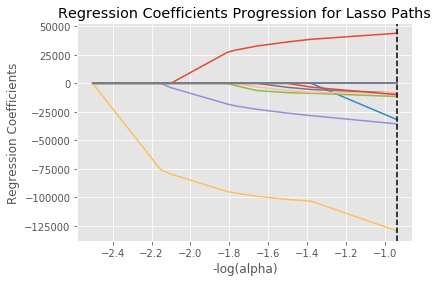

In [196]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5,1,'Mean squared error on each fold')

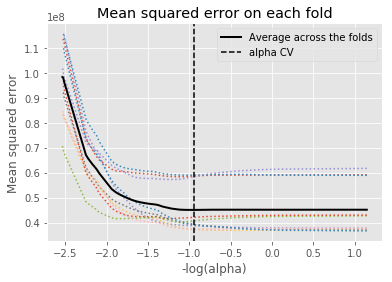

In [197]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [198]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
42829002.45419026
test data MSE
41071264.79756079


In [199]:
# R-square from training and test data
rsquared_train=model.score(X_train,y_train)
rsquared_test=model.score(X_test,y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.563331895461376
test data R-square
0.5386860233396417


In [200]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [201]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 11)

Text(0,0.5,'weights')

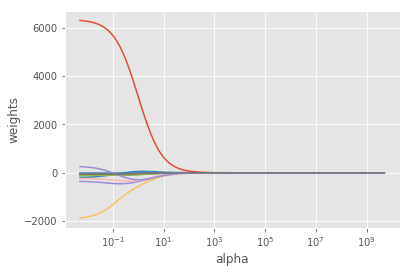

In [203]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [204]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [205]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Derby              1213.215554
Victoire_dom         47.317211
Dom_plac_joun      -184.176490
ext_plac_joun        -6.675129
Dom_plac_final     -270.653230
ext_plac_final       -6.412419
Jours_label        -158.438516
exterieur_label      -7.304636
Domicile_label        0.000000
Capacite_label     -245.010375
Heure_label         -33.652489
dtype: float64
74675477.278723


In [206]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

Derby              6.471519e-07
Victoire_dom       3.626118e-08
Dom_plac_joun     -1.263517e-07
ext_plac_joun      6.439238e-10
Dom_plac_final    -1.720647e-07
ext_plac_final    -3.233809e-10
Jours_label       -1.012829e-07
exterieur_label   -2.201120e-09
Domicile_label     0.000000e+00
Capacite_label    -1.745753e-07
Heure_label       -1.948991e-08
dtype: float64
103845293.06604074


In [207]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

Derby              5.915345e+03
Victoire_dom      -1.708434e+02
Dom_plac_joun     -2.210282e+02
ext_plac_joun      8.106414e+00
Dom_plac_final    -1.885210e+03
ext_plac_final    -3.866428e+01
Jours_label       -2.031987e+02
exterieur_label   -5.333332e+01
Domicile_label    -1.040784e-11
Capacite_label     2.784326e+00
Heure_label       -1.479820e+02
dtype: float64
49004048.67473999


In [208]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.01155064850041579

In [209]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

49135558.663666815

In [210]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

Derby              6257.154031
Victoire_dom       -176.910425
Dom_plac_joun      -367.891444
ext_plac_joun       -56.740192
Dom_plac_final    -1815.099045
ext_plac_final     -112.181083
Jours_label        -242.967791
exterieur_label     -45.135855
Domicile_label        0.000000
Capacite_label      228.031309
Heure_label         -53.955189
dtype: float64